# 2021 KOSAIM Hands-On

![alt text](https://adeshpande3.github.io/assets/Cover.png)

Convolutional Neural Network

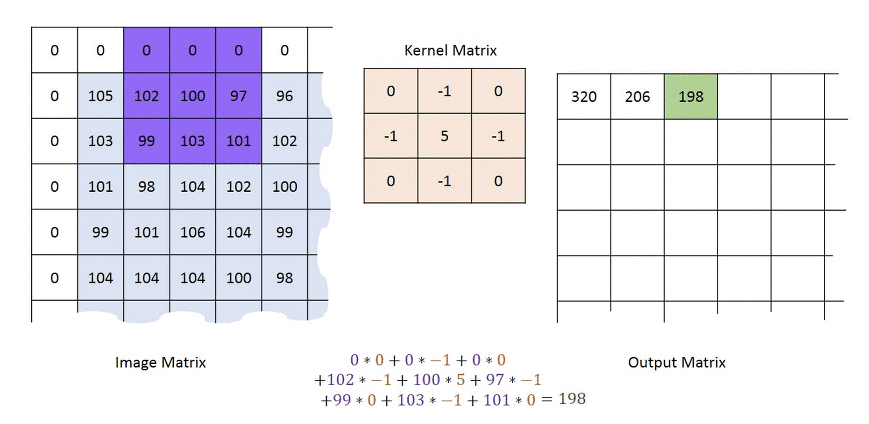

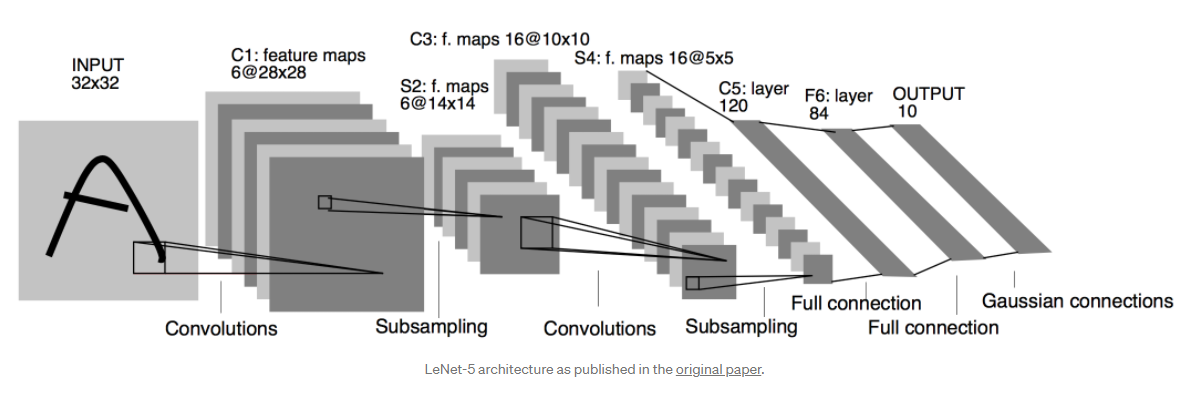

# -1. Colab GPU setting... 

Menu -> Runtime -> Change runtime type 

![gpu setting](https://raw.githubusercontent.com/mi2rl/datasets/master/gpu.png)


In [1]:
#check GPU is well mounted
!nvidia-smi

Thu May 20 08:01:54 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!rm -rf *

# [1] 데이터 준비: MedNIST dataset


## 1.1. 데이터 다운로드

In [3]:
!pwd # 현재 경로 확인

/content


In [1]:
!ls # 현재 경로 내용 확인

sample_data


In [2]:
# 데이터 다운로드
!wget https://raw.githubusercontent.com/mi2rl/datasets/master/AMC_chestxray_PGGAN.zip

--2021-05-20 08:28:17--  https://raw.githubusercontent.com/mi2rl/datasets/master/AMC_chestxray_PGGAN.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92629342 (88M) [application/zip]
Saving to: ‘AMC_chestxray_PGGAN.zip’

AMC_chestxray_PGGAN 100%[===================>]  88.34M   102MB/s    in 0.9s    

2021-05-20 08:28:19 (102 MB/s) - ‘AMC_chestxray_PGGAN.zip’ saved [92629342/92629342]



In [5]:
!ls

AMC_chestxray_PGGAN.zip


In [3]:
# 압축 풀기
!unzip AMC_chestxray_PGGAN.zip

Archive:  AMC_chestxray_PGGAN.zip
   creating: AMC_chestxray_PGGAN/
   creating: AMC_chestxray_PGGAN/interstitialOpacity/
  inflating: AMC_chestxray_PGGAN/interstitialOpacity/img000050.png  
  inflating: AMC_chestxray_PGGAN/interstitialOpacity/img000195.png  
  inflating: AMC_chestxray_PGGAN/interstitialOpacity/img000530.png  
  inflating: AMC_chestxray_PGGAN/interstitialOpacity/img000555.png  
  inflating: AMC_chestxray_PGGAN/interstitialOpacity/img000666.png  
  inflating: AMC_chestxray_PGGAN/interstitialOpacity/img000789.png  
  inflating: AMC_chestxray_PGGAN/interstitialOpacity/img000826.png  
  inflating: AMC_chestxray_PGGAN/interstitialOpacity/img000909.png  
  inflating: AMC_chestxray_PGGAN/interstitialOpacity/img001043.png  
  inflating: AMC_chestxray_PGGAN/interstitialOpacity/img001076.png  
  inflating: AMC_chestxray_PGGAN/interstitialOpacity/img001078.png  
  inflating: AMC_chestxray_PGGAN/interstitialOpacity/img001181.png  
  inflating: AMC_chestxray_PGGAN/interstitialOpaci

In [9]:
!ls

AMC_chestxray_PGGAN  AMC_chestxray_PGGAN.zip


In [4]:
!ls AMC_chestxray_PGGAN  

interstitialOpacity  nodule  normal


## 1.2. 데이터 파악

1. /interstitialOpacity
2. /nodule
3. /normal


In [5]:
# 패키지 불러오기
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [6]:
dataDir = 'AMC_chestxray_PGGAN' # 데이터 위치
classNames = os.listdir(dataDir) # 각 클래스의 이름들
numClass = len(classNames)               # 클래스 개수

print('Class names: ', classNames)
print('number of classes', numClass)

for tmp in range(len(classNames)):
  NImage=len(os.listdir(os.path.join(dataDir, classNames[tmp])))
  print('Class ', classNames[tmp], 'has ', NImage, ' of images.')
  

Class names:  ['normal', 'nodule', 'interstitialOpacity']
number of classes 3
Class  normal has  1000  of images.
Class  nodule has  1000  of images.
Class  interstitialOpacity has  1000  of images.


In [10]:
os.listdir(os.path.join(dataDir, 'interstitialOpacity'))

['img038822.png',
 'img034689.png',
 'img057823.png',
 'img070888.png',
 'img018933.png',
 'img049482.png',
 'img035495.png',
 'img044121.png',
 'img094332.png',
 'img045484.png',
 'img096388.png',
 'img048959.png',
 'img078874.png',
 'img004924.png',
 'img070921.png',
 'img058588.png',
 'img039631.png',
 'img092314.png',
 'img098679.png',
 'img060790.png',
 'img013057.png',
 'img087892.png',
 'img097193.png',
 'img026422.png',
 'img034380.png',
 'img026456.png',
 'img022855.png',
 'img072802.png',
 'img094030.png',
 'img002171.png',
 'img053177.png',
 'img045651.png',
 'img069472.png',
 'img097009.png',
 'img003167.png',
 'img023806.png',
 'img022932.png',
 'img096684.png',
 'img053413.png',
 'img046307.png',
 'img021043.png',
 'img065021.png',
 'img002177.png',
 'img095895.png',
 'img061481.png',
 'img089741.png',
 'img005706.png',
 'img091901.png',
 'img079333.png',
 'img051069.png',
 'img005501.png',
 'img011548.png',
 'img035373.png',
 'img085458.png',
 'img007444.png',
 'img09787

Interstitial Opacity data description
num of images 1000
sample image size (224, 224)
sample filename img038822.png


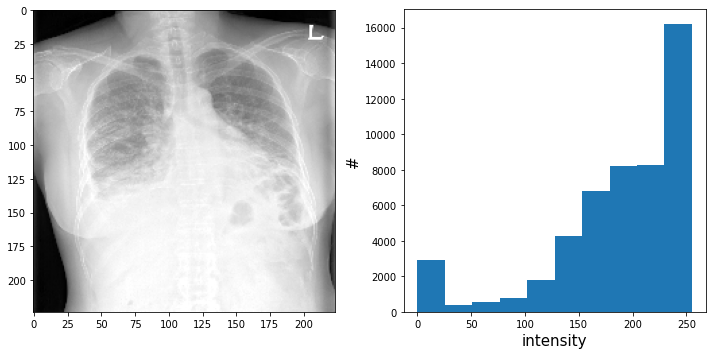

In [11]:
#Interstitial Opacity
interstitialOpacity_list=os.listdir(os.path.join(dataDir, 'interstitialOpacity'))
sampleImage=cv2.imread(os.path.join(dataDir, 'interstitialOpacity', interstitialOpacity_list[0]), 0)

print('Interstitial Opacity data description')
print('num of images', len(interstitialOpacity_list))
print('sample image size', np.shape(sampleImage))
print('sample filename', interstitialOpacity_list[0])

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(sampleImage, cmap='gray')
plt.subplot(122)
plt.hist(sampleImage.flatten())
plt.xlabel('intensity', fontsize=15)
plt.ylabel('#', fontsize=15)
plt.tight_layout()
plt.show()

nodule data description
num of images 1000
sample image size (224, 224)
sample filename img028546.png


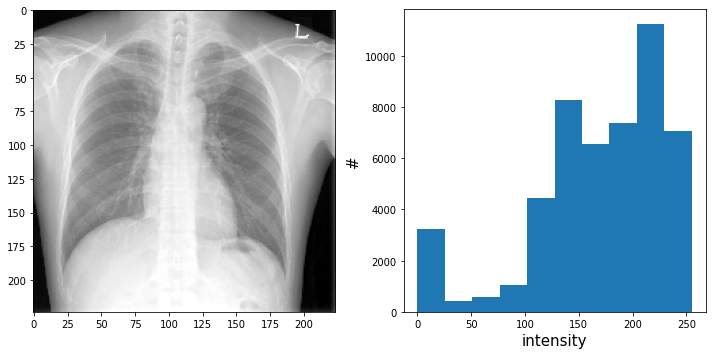

In [12]:
#nodule
nodule_list=os.listdir(os.path.join(dataDir, 'nodule'))
sampleImage=cv2.imread(os.path.join(dataDir, 'nodule', nodule_list[0]), 0)

print('nodule data description')
print('num of images', len(nodule_list))
print('sample image size', np.shape(sampleImage))
print('sample filename', nodule_list[0])

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(sampleImage, cmap='gray')
plt.subplot(122)
plt.hist(sampleImage.flatten())
plt.xlabel('intensity', fontsize=15)
plt.ylabel('#', fontsize=15)
plt.tight_layout()
plt.show()

normal data description
num of images 1000
sample image size (224, 224)
sample filename img000542.png


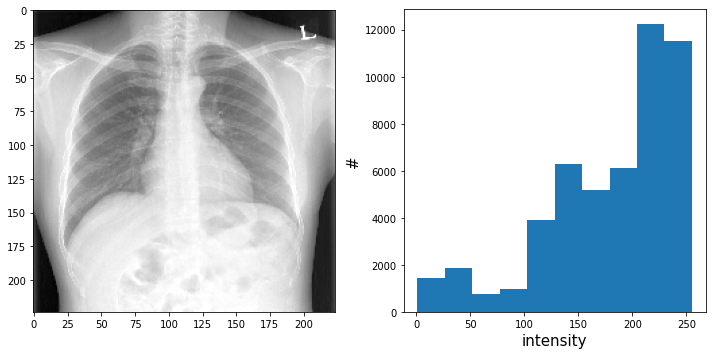

In [13]:
#normal
nodule_list=os.listdir(os.path.join(dataDir, 'normal'))
sampleImage=cv2.imread(os.path.join(dataDir, 'normal', nodule_list[0]), 0)

print('normal data description')
print('num of images', len(nodule_list))
print('sample image size', np.shape(sampleImage))
print('sample filename', nodule_list[0])

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(sampleImage, cmap='gray')
plt.subplot(122)
plt.hist(sampleImage.flatten())
plt.xlabel('intensity', fontsize=15)
plt.ylabel('#', fontsize=15)
plt.tight_layout()
plt.show()

# [2] VGG16를 이용한 분류 실습



![VGG16 네트워크 구조](https://www.cs.toronto.edu/~frossard/post/vgg16/vgg16.png)

In [7]:
# import keras,os
# 
# from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

# 패키지 불러오기
import keras
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense
from keras.models import Model

## 2.1. [Quiz] 순서가 섞인 layer들을 VGG16 구성에 맞게 배치해보세요.

In [15]:
model = Sequential()

In [16]:
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [18]:
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [17]:
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [20]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [19]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [21]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=1, activation="sigmoid")) 

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

## 2.2. VGG 모델 불러오기

In [8]:
from keras.applications import vgg16

# VGG16 모델 불러오기
model = vgg16.VGG16()

# 모델의 모양을 보여준다.
model.summary()

553467904/553467096 [==============================] - 6s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

## 2.3. keras 에서 제공되는 모델들 참고: https://keras.io/applications/

## 2.4. VGG 모델로 Chest X-ray dataset 학습하기

### 2.4.1. Dataset 나누기
* Train / Validation / Test

In [14]:
import shutil
try:
  shutil.rmtree('dataset')
except:
  pass

In [11]:
print(classNames)

['normal', 'nodule', 'interstitialOpacity']


In [12]:
import tqdm
import random

trainFrac = 0.7
validFrac = 0.1   # Define the fraction of images to move to validation dataset
testFrac = 0.2    # Define the fraction of images to move to test dataset

for tmp in tqdm.tqdm(range(len(classNames))):

  os.makedirs(os.path.join('dataset/train', classNames[tmp]))
  os.makedirs(os.path.join('dataset/valid', classNames[tmp]))
  os.makedirs(os.path.join('dataset/test', classNames[tmp]))

  filelist_tmp=os.listdir(os.path.join(dataDir, classNames[tmp]))
  random.shuffle(filelist_tmp)
  train_N=int(len(filelist_tmp)*trainFrac)
  valid_N=int(len(filelist_tmp)*validFrac)
  test_N=len(filelist_tmp)-train_N-valid_N

  trainList_tmp=filelist_tmp[:train_N]
  validList_tmp=filelist_tmp[train_N:train_N+valid_N]
  testList_tmp=filelist_tmp[train_N+valid_N:]

  for tmp2 in range(len(trainList_tmp)):
    shutil.copy(os.path.join(dataDir, classNames[tmp], trainList_tmp[tmp2]), os.path.join('dataset/train', classNames[tmp]))

  for tmp2 in range(len(validList_tmp)):
    shutil.copy(os.path.join(dataDir, classNames[tmp], validList_tmp[tmp2]), os.path.join('dataset/valid', classNames[tmp]))

  for tmp2 in range(len(testList_tmp)):
    shutil.copy(os.path.join(dataDir, classNames[tmp], testList_tmp[tmp2]), os.path.join('dataset/test', classNames[tmp]))

  print('')
  print('Class: ', classNames[tmp])
  print('num of train set: ', len(trainList_tmp))
  print('num of valid set: ', len(validList_tmp))
  print('num of test set: ', len(testList_tmp))

 67%|██████▋   | 2/3 [00:00<00:00,  6.21it/s]


Class:  normal
num of train set:  700
num of valid set:  100
num of test set:  200

Class:  nodule
num of train set:  700
num of valid set:  100
num of test set:  200


100%|██████████| 3/3 [00:00<00:00,  6.02it/s]


Class:  interstitialOpacity
num of train set:  700
num of valid set:  100
num of test set:  200


### 2.4.2. Image Data Generator 정의

**Keras API - ImageDataGenerator: 일정한 규칙으로 만들어진 폴더구조에서 데이터셋을 자동으로 불러와 학습에 사용할 수 있게 도와주는 API**

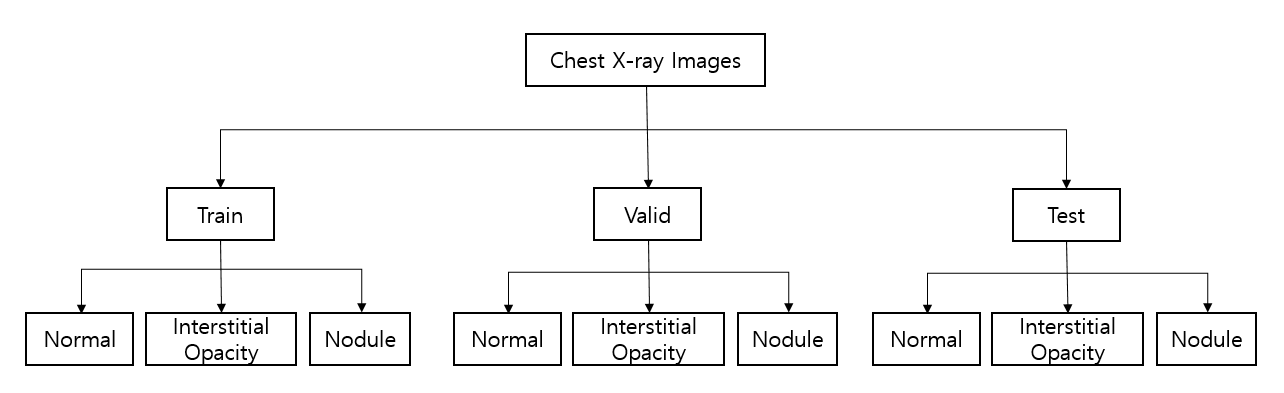

In [13]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = './dataset/train'
valid_dir = './dataset/valid'
test_dir = './dataset/test'
image_size = 224
batch_size = 32

# 학습에 사용될 이미지 데이터 생성기
train_datagen = ImageDataGenerator(rescale=1/255)
 
# 검증에 사용될 이미지 데이터 생성기
valid_datagen = ImageDataGenerator(rescale=1/255)

# 테스트에 사용될 이미지 데이터 생성기
test_datagen = ImageDataGenerator(rescale=1/255)

# 학습에 사용될 데이터 생성기  
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

# 검증에 사용될 데이터 생성기
valid_generator = valid_datagen.flow_from_directory(
        valid_dir,
        target_size=(image_size, image_size),
        batch_size=1,
        class_mode='categorical',
        shuffle=False)

# 테스트에 사용될 데이터 생성기
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 2100 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


### 2.4.3. VGG 모델을 이용하여 학습하기

In [11]:
# 패키지 불러오기
from keras.applications import VGG16
from keras.layers import Dropout
from keras import optimizers
import keras.backend as K

K.clear_session() # 새로운 세션으로 시작

In [12]:
# 모델 불러오기
vgg_model = VGG16(weights=None, include_top=False, input_shape=(image_size, image_size, 3))
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
# VGG16모델에 Fully Connected부분을 재구성해서 추가
x = Flatten()(vgg_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
pred = Dense(numClass, activation='softmax')(x)

model = Model(vgg_model.input, pred)

In [14]:
# 새로운 모델 요약
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [15]:
!pip install livelossplot

In [16]:
from livelossplot import PlotLossesKeras
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback

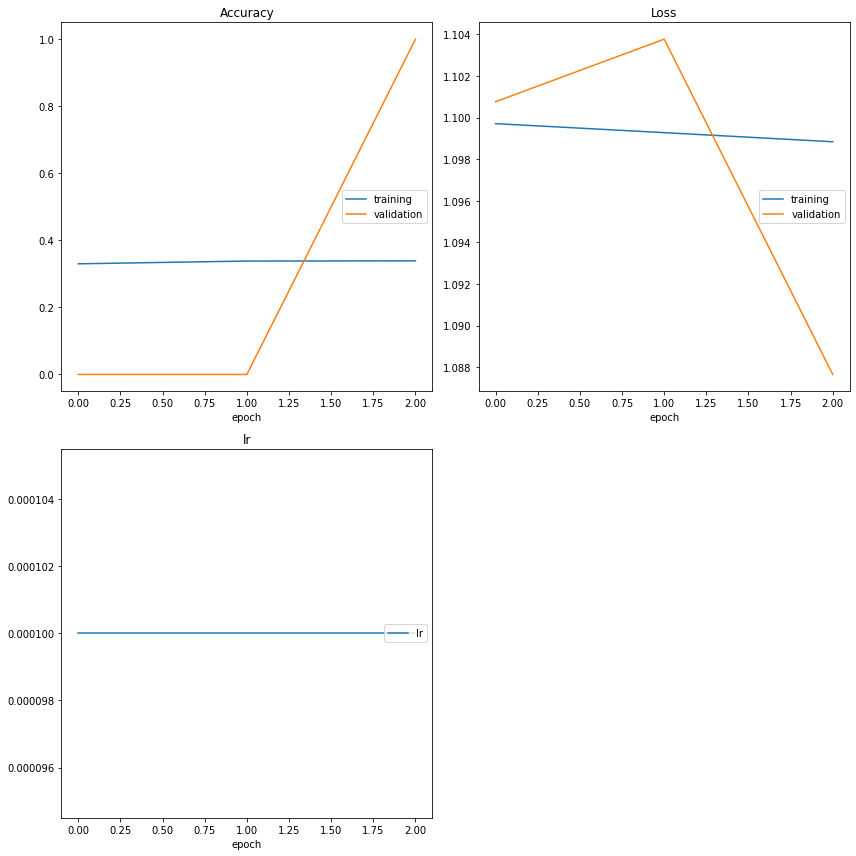

Accuracy
	training         	 (min:    0.330, max:    0.339, cur:    0.339)
	validation       	 (min:    0.000, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    1.099, max:    1.100, cur:    1.099)
	validation       	 (min:    1.088, max:    1.104, cur:    1.088)
lr
	lr               	 (min:    0.000, max:    0.000, cur:    0.000)
Epoch 4/10
23/50 [============>.................] - ETA: 1:47 - loss: 1.0992 - acc: 0.3418

KeyboardInterrupt: ignored

In [17]:
import keras

datapath='./output'
FOLDER = 'study1'

try:
  shutil.rmtree(os.path.join(datapath, FOLDER))
except:
  pass

if not os.path.isdir(os.path.join(datapath, FOLDER)):
    os.makedirs(os.path.join(datapath, FOLDER))

if not os.path.isdir(os.path.join(datapath, FOLDER, 'weights')):
    os.makedirs(os.path.join(datapath, FOLDER, 'weights'))
    
mc = keras.callbacks.ModelCheckpoint(os.path.join(datapath, FOLDER, 'weights', 'train_weights_epoch_{epoch:03d}.h5'),
                                    save_weights_only=True, save_freq=1)

hist = keras.callbacks.History()


csv_log   = os.path.join(os.path.join(datapath, FOLDER), 'training.csv')

early_stop = EarlyStopping(monitor='val_loss', patience=8, verbose=1, min_delta=1e-4)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=50, verbose=1, min_delta=1e-4)
callbacks_list = [mc, hist, reduce_lr, PlotLossesKeras(), CSVLogger(csv_log, append=False, separator=";")] 

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# 모델 학습
history = model.fit(
      train_generator,
      steps_per_epoch=50 ,
      epochs=10,
      callbacks=callbacks_list,
      validation_data=valid_generator,
      validation_steps=25,
      verbose=1)

### 2.4.4. 학습된 모델을 이용해 Test 데이터에 대한 Prediction

In [41]:
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
# For prediction purposes
y_pred = model.predict_generator(valid_generator, steps=valid_generator.samples, verbose=1)
y_pred1 = np.argmax(y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


600/600 [==============================] - 7s 10ms/step


In [43]:
# y_test labeling
y_valid = valid_generator.labels

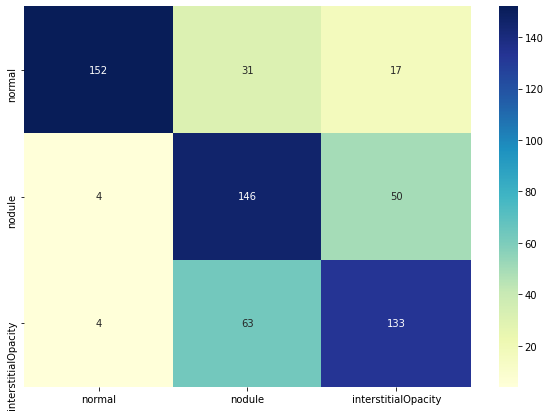

In [44]:
# calculate confusion matrix for the predicted dataset
cm = confusion_matrix(y_valid, y_pred1)

# make a dataframe using cm array
df_cm = pd.DataFrame(cm, index = [i for i in classNames], columns = [i for i in classNames])

# plot confusion matrix
plt.figure(figsize = (10, 7))
sn.heatmap(df_cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [45]:
# classification report generation: precision, recall, f1-score. 
print(classification_report(y_valid, y_pred1, target_names=classNames))

                     precision    recall  f1-score   support

             normal       0.95      0.76      0.84       200
             nodule       0.61      0.73      0.66       200
interstitialOpacity       0.67      0.67      0.67       200

           accuracy                           0.72       600
          macro avg       0.74      0.72      0.72       600
       weighted avg       0.74      0.72      0.72       600



### Append. Model Interpretability with GradCAM

![gradCAM](https://camo.githubusercontent.com/450498bd998fd99d51b647d2b6c8631e94585522/687474703a2f2f692e696d6775722e636f6d2f4a614762645a352e706e67)

**Grad-CAM: Why did you say that? Visual Explanations from Deep Networks via Gradient-based Localization**
Ramprasaath R. Selvaraju, Abhishek Das, Ramakrishna Vedantam, Michael Cogswell, Devi Parikh, Dhruv Batra
https://arxiv.org/abs/1610.02391

**Example: 'Boxer'**

![alt text](https://github.com/PowerOfCreation/keras-grad-cam/raw/master/examples/cat_dog.png) 
![alt text](https://github.com/PowerOfCreation/keras-grad-cam/raw/master/examples/cat_dog_242_gradcam.jpg)
![alt text](https://github.com/PowerOfCreation/keras-grad-cam/raw/master/examples/cat_dog_242_guided_gradcam.jpg)

In [46]:
def grad_cam(input_model, image):
    preds = input_model.predict(image)
    predicted_label = np.argmax(preds[0])
    heatmap_model = keras.Model([input_model.inputs], [input_model.get_layer('block5_conv3').output, input_model.output])        
    
    with tf.GradientTape() as tape:
        last_conv_outputs, predictions = heatmap_model(image) # VGG16의 마지막 convolution layer의 특성맵과 예측 벡터
        output = predictions[:, predicted_label]              # 예측 벡터에서 해당 클래스 항목
        
    grads = tape.gradient(output, last_conv_outputs)      # VGG16의 마지막 convolution layer의 특성맵 출력에 대한 해당 클래스의 그래디언트
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))  # 특성맵 채널별 그래디언트 평균값이 담긴 (512,) 크기의 벡터
    
    last_conv_outputs = last_conv_outputs.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i, w in enumerate(pooled_grads):                    # 해당 클래스에 대한 채널의 중요도를 특성 맵 배열의 채널에 곱함
        last_conv_outputs[:,:,i] *= w
        
    heatmap = np.mean(last_conv_outputs, axis=-1) # 만들어진 특성 맵에서 채널 축을 따라 평균 --> 해당 클래스의 히트맵
    
    # 히트맵 후처리
    heatmap = np.maximum(heatmap, 0)               
    heatmap /= np.max(heatmap)
    heatmap = cv2.resize(heatmap, (224, 224))

    # 입력 영상을 8-bit RGB 영상으로 변환
    image = image[0, :]
    image -= np.min(image)
    image = np.minimum(image, 255)

    cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
    cam = np.float32(cam) + np.float32(image)
    cam = 255 * cam / np.max(cam)
    
    return np.uint8(cam), heatmap, predicted_label

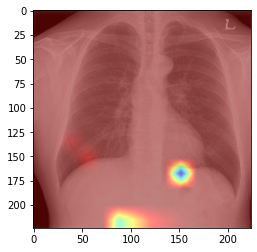

In [48]:
import tensorflow as tf

# Select a random query image+
validList=os.listdir(os.path.join(dataDir, 'nodule'))
inum = np.random.randint(len(validList))
qimage=cv2.imread(os.path.join(dataDir, 'nodule', validList[inum]))
qimage = cv2.resize(qimage, (224, 224), interpolation = cv2.INTER_CUBIC)
# qimage0 = load_img(os.path.join(datavalidList_tmp[inum], target_size=(224, 224))

# qimage  = img_to_array(qimage0)
qimage  = qimage.reshape((1, 224, 224, 3))
qimage  = vgg16.preprocess_input(qimage)

# CAM 출력
cam, heatmap, plabel = grad_cam(model, qimage)
# plt.title('T:'+classNames[imageClass[inum]]+', P:'+classNames[plabel])
plt.imshow(cam)
plt.show()

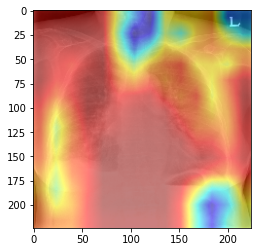

In [49]:
import tensorflow as tf

# Select a random query image+
validList=os.listdir(os.path.join(dataDir, 'interstitialOpacity'))
inum = np.random.randint(len(validList))
qimage=cv2.imread(os.path.join(dataDir, 'interstitialOpacity', validList[inum]))
qimage = cv2.resize(qimage, (224, 224), interpolation = cv2.INTER_CUBIC)
# qimage0 = load_img(os.path.join(datavalidList_tmp[inum], target_size=(224, 224))

# qimage  = img_to_array(qimage0)
qimage  = qimage.reshape((1, 224, 224, 3))
qimage  = vgg16.preprocess_input(qimage)

# CAM 출력
cam, heatmap, plabel = grad_cam(model, qimage)
# plt.title('T:'+classNames[imageClass[inum]]+', P:'+classNames[plabel])
plt.imshow(cam)
plt.show()

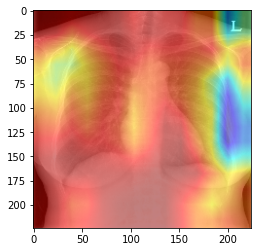

In [50]:
import tensorflow as tf

# Select a random query image+
validList=os.listdir(os.path.join(dataDir, 'normal'))
inum = np.random.randint(len(validList))
qimage=cv2.imread(os.path.join(dataDir, 'normal', validList[inum]))
qimage = cv2.resize(qimage, (224, 224), interpolation = cv2.INTER_CUBIC)
# qimage0 = load_img(os.path.join(datavalidList_tmp[inum], target_size=(224, 224))

# qimage  = img_to_array(qimage0)
qimage  = qimage.reshape((1, 224, 224, 3))
qimage  = vgg16.preprocess_input(qimage)

# CAM 출력
cam, heatmap, plabel = grad_cam(model, qimage)
# plt.title('T:'+classNames[imageClass[inum]]+', P:'+classNames[plabel])
plt.imshow(cam)
plt.show()

### 3.1 VGG16 모델에 ImageNet의 weight를 전이학습하여 학습하기

In [ ]:
# 패키지 불러오기
from keras.applications import VGG16
from keras.layers import Dropout
from keras import optimizers
import keras.backend as K

K.clear_session() # 새로운 세션으로 시작

In [ ]:
# 모델 불러오기
vgg_model = VGG16(weights=imagenet, include_top=False, input_shape=(image_size, image_size, 3))
vgg_model.summary()

In [ ]:
# VGG16모델에 Fully Connected부분을 재구성해서 추가
x = Flatten()(vgg_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
pred = Dense(numClass, activation='softmax')(x)

model = Model(vgg_model.input, pred)

In [ ]:
import keras

datapath='./output'
FOLDER = 'study1'

try:
  shutil.rmtree(os.path.join(datapath, FOLDER))
except:
  pass

if not os.path.isdir(os.path.join(datapath, FOLDER)):
    os.makedirs(os.path.join(datapath, FOLDER))

if not os.path.isdir(os.path.join(datapath, FOLDER, 'weights')):
    os.makedirs(os.path.join(datapath, FOLDER, 'weights'))
    
mc = keras.callbacks.ModelCheckpoint(os.path.join(datapath, FOLDER, 'weights', 'train_weights_epoch_{epoch:03d}.h5'),
                                    save_weights_only=True, save_freq=1)

hist = keras.callbacks.History()


csv_log   = os.path.join(os.path.join(datapath, FOLDER), 'training.csv')

early_stop = EarlyStopping(monitor='val_loss', patience=8, verbose=1, min_delta=1e-4)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=50, verbose=1, min_delta=1e-4)
callbacks_list = [mc, hist, reduce_lr, PlotLossesKeras(), CSVLogger(csv_log, append=False, separator=";")] 

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# 모델 학습
history = model.fit(
      train_generator,
      steps_per_epoch=50 ,
      epochs=10,
      callbacks=callbacks_list,
      validation_data=valid_generator,
      validation_steps=25,
      verbose=1)

### 3.2. 학습된 모델을 이용해 Test 데이터에 대한 Prediction

In [ ]:
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# For prediction purposes
y_pred = model.predict_generator(valid_generator, steps=valid_generator.samples, verbose=1)
y_pred1 = np.argmax(y_pred, axis=1)

In [ ]:
# calculate confusion matrix for the predicted dataset
cm = confusion_matrix(y_valid, y_pred1)

# make a dataframe using cm array
df_cm = pd.DataFrame(cm, index = [i for i in classNames], columns = [i for i in classNames])

# plot confusion matrix
plt.figure(figsize = (10, 7))
sn.heatmap(df_cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [ ]:
# classification report generation: precision, recall, f1-score. 
print(classification_report(y_valid, y_pred1, target_names=classNames))

In [ ]:
def grad_cam(input_model, image):
    preds = input_model.predict(image)
    predicted_label = np.argmax(preds[0])
    heatmap_model = keras.Model([input_model.inputs], [input_model.get_layer('block5_conv3').output, input_model.output])        
    
    with tf.GradientTape() as tape:
        last_conv_outputs, predictions = heatmap_model(image) # VGG16의 마지막 convolution layer의 특성맵과 예측 벡터
        output = predictions[:, predicted_label]              # 예측 벡터에서 해당 클래스 항목
        
    grads = tape.gradient(output, last_conv_outputs)      # VGG16의 마지막 convolution layer의 특성맵 출력에 대한 해당 클래스의 그래디언트
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))  # 특성맵 채널별 그래디언트 평균값이 담긴 (512,) 크기의 벡터
    
    last_conv_outputs = last_conv_outputs.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i, w in enumerate(pooled_grads):                    # 해당 클래스에 대한 채널의 중요도를 특성 맵 배열의 채널에 곱함
        last_conv_outputs[:,:,i] *= w
        
    heatmap = np.mean(last_conv_outputs, axis=-1) # 만들어진 특성 맵에서 채널 축을 따라 평균 --> 해당 클래스의 히트맵
    
    # 히트맵 후처리
    heatmap = np.maximum(heatmap, 0)               
    heatmap /= np.max(heatmap)
    heatmap = cv2.resize(heatmap, (224, 224))

    # 입력 영상을 8-bit RGB 영상으로 변환
    image = image[0, :]
    image -= np.min(image)
    image = np.minimum(image, 255)

    cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
    cam = np.float32(cam) + np.float32(image)
    cam = 255 * cam / np.max(cam)
    
    return np.uint8(cam), heatmap, predicted_label


In [ ]:
import tensorflow as tf

# Select a random query image+
validList=os.listdir(os.path.join(dataDir, 'nodule'))
inum = np.random.randint(len(validList))
qimage=cv2.imread(os.path.join(dataDir, 'nodule', validList[inum]))
qimage = cv2.resize(qimage, (224, 224), interpolation = cv2.INTER_CUBIC)
# qimage0 = load_img(os.path.join(datavalidList_tmp[inum], target_size=(224, 224))

# qimage  = img_to_array(qimage0)
qimage  = qimage.reshape((1, 224, 224, 3))
qimage  = vgg16.preprocess_input(qimage)

# CAM 출력
cam, heatmap, plabel = grad_cam(model, qimage)
# plt.title('T:'+classNames[imageClass[inum]]+', P:'+classNames[plabel])
plt.imshow(cam)
plt.show()




import tensorflow as tf

# Select a random query image+
validList=os.listdir(os.path.join(dataDir, 'interstitialOpacity'))
inum = np.random.randint(len(validList))
qimage=cv2.imread(os.path.join(dataDir, 'interstitialOpacity', validList[inum]))
qimage = cv2.resize(qimage, (224, 224), interpolation = cv2.INTER_CUBIC)
# qimage0 = load_img(os.path.join(datavalidList_tmp[inum], target_size=(224, 224))

# qimage  = img_to_array(qimage0)
qimage  = qimage.reshape((1, 224, 224, 3))
qimage  = vgg16.preprocess_input(qimage)

# CAM 출력
cam, heatmap, plabel = grad_cam(model, qimage)
# plt.title('T:'+classNames[imageClass[inum]]+', P:'+classNames[plabel])
plt.imshow(cam)
plt.show()





import tensorflow as tf

# Select a random query image+
validList=os.listdir(os.path.join(dataDir, 'normal'))
inum = np.random.randint(len(validList))
qimage=cv2.imread(os.path.join(dataDir, 'normal', validList[inum]))
qimage = cv2.resize(qimage, (224, 224), interpolation = cv2.INTER_CUBIC)
# qimage0 = load_img(os.path.join(datavalidList_tmp[inum], target_size=(224, 224))

# qimage  = img_to_array(qimage0)
qimage  = qimage.reshape((1, 224, 224, 3))
qimage  = vgg16.preprocess_input(qimage)

# CAM 출력
cam, heatmap, plabel = grad_cam(model, qimage)
# plt.title('T:'+classNames[imageClass[inum]]+', P:'+classNames[plabel])
plt.imshow(cam)
plt.show()

### 4.1 VGG16 모델에 전이학습+데이터증강하여 학습하기

### Append. 데이터 증강
**Data augmentation: 데이터에 다양한 형태의 변화를 임의로 생성하여 데이터의 갯수와 다양성을 증가시키는 방법**

![Data augmentation](https://miro.medium.com/max/1250/1*rvwzKkvhlDN3Wo_4Oay_4Q.png)
https://medium.com/@thimblot/data-augmentation-boost-your-image-dataset-with-few-lines-of-python-155c2dc1baec

In [ ]:
import shutil
try:
  shutil.rmtree('dataset')
except:
  pass

In [16]:
import tqdm
import random

trainFrac = 0.7
validFrac = 0.1   # Define the fraction of images to move to validation dataset
testFrac = 0.2    # Define the fraction of images to move to test dataset

for tmp in tqdm.tqdm(range(len(classNames))):

  os.makedirs(os.path.join('dataset/train', classNames[tmp]))
  os.makedirs(os.path.join('dataset/valid', classNames[tmp]))
  os.makedirs(os.path.join('dataset/test', classNames[tmp]))

  filelist_tmp=os.listdir(os.path.join(dataDir, classNames[tmp]))
  random.shuffle(filelist_tmp)
  train_N=int(len(filelist_tmp)*trainFrac)
  valid_N=int(len(filelist_tmp)*validFrac)
  test_N=len(filelist_tmp)-train_N-valid_N

  trainList_tmp=filelist_tmp[:train_N]
  validList_tmp=filelist_tmp[train_N:train_N+valid_N]
  testList_tmp=filelist_tmp[train_N+valid_N:]

  for tmp2 in range(len(trainList_tmp)):
    shutil.copy(os.path.join(dataDir, classNames[tmp], trainList_tmp[tmp2]), os.path.join('dataset/train', classNames[tmp]))

  for tmp2 in range(len(validList_tmp)):
    shutil.copy(os.path.join(dataDir, classNames[tmp], validList_tmp[tmp2]), os.path.join('dataset/valid', classNames[tmp]))

  for tmp2 in range(len(testList_tmp)):
    shutil.copy(os.path.join(dataDir, classNames[tmp], testList_tmp[tmp2]), os.path.join('dataset/test', classNames[tmp]))

  print('')
  print('Class: ', classNames[tmp])
  print('num of train set: ', len(trainList_tmp))
  print('num of valid set: ', len(validList_tmp))
  print('num of test set: ', len(testList_tmp))

 67%|██████▋   | 2/3 [00:00<00:00,  6.03it/s]


Class:  normal
num of train set:  700
num of valid set:  100
num of test set:  200

Class:  nodule
num of train set:  700
num of valid set:  100
num of test set:  200


100%|██████████| 3/3 [00:00<00:00,  5.79it/s]


Class:  interstitialOpacity
num of train set:  700
num of valid set:  100
num of test set:  200


In [17]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = './dataset/train'
valid_dir = './dataset/valid'
test_dir = './dataset/test'
image_size = 224
batch_size = 32

# 학습에 사용될 이미지 데이터 생성기
train_datagen = ImageDataGenerator(
                  rescale=1/255,
                  rotation_range=5,
                  width_shift_range=0.2,
                  height_shift_range=0.2,
                  shear_range=0.2,
                  zoom_range=0.2,
                  fill_mode='nearest')
 
# 검증에 사용될 이미지 데이터 생성기
valid_datagen = ImageDataGenerator(rescale=1/255)

# 테스트에 사용될 이미지 데이터 생성기
test_datagen = ImageDataGenerator(rescale=1/255)

# 학습에 사용될 데이터 생성기  
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

# 검증에 사용될 데이터 생성기
valid_generator = valid_datagen.flow_from_directory(
        valid_dir,
        target_size=(image_size, image_size),
        batch_size=1,
        class_mode='categorical',
        shuffle=False)

# 테스트에 사용될 데이터 생성기
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 2100 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [18]:
# 패키지 불러오기
from keras.applications import VGG16
from keras.layers import Dropout
from keras import optimizers
import keras.backend as K

K.clear_session() # 새로운 세션으로 시작

In [21]:
# 모델 불러오기
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# VGG16모델에 Fully Connected부분을 재구성해서 추가
x = Flatten()(vgg_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
pred = Dense(numClass, activation='softmax')(x)

model = Model(vgg_model.input, pred)
vgg_model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [23]:
!pip install livelossplot

In [24]:
from livelossplot import PlotLossesKeras
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback

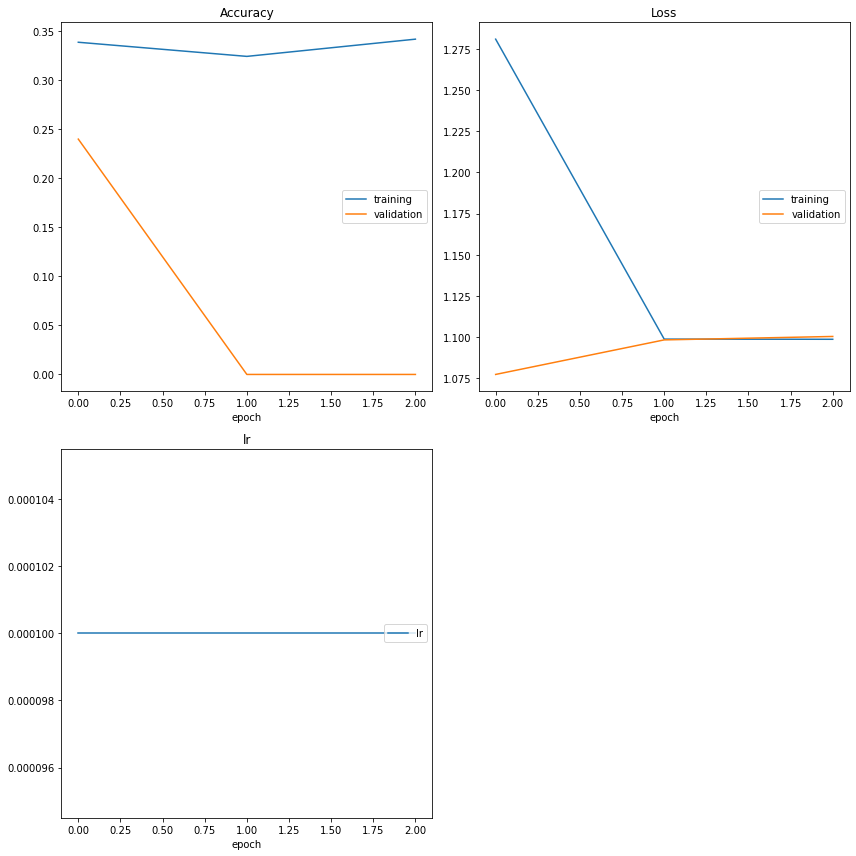

Accuracy
	training         	 (min:    0.324, max:    0.342, cur:    0.342)
	validation       	 (min:    0.000, max:    0.240, cur:    0.000)
Loss
	training         	 (min:    1.099, max:    1.281, cur:    1.099)
	validation       	 (min:    1.077, max:    1.100, cur:    1.100)
lr
	lr               	 (min:    0.000, max:    0.000, cur:    0.000)
Epoch 4/10
16/50 [========>.....................] - ETA: 2:07 - loss: 1.0985 - acc: 0.3537

In [ ]:
import keras

datapath='./output'
FOLDER = 'study3'

try:
  shutil.rmtree(os.path.join(datapath, FOLDER))
except:
  pass

if not os.path.isdir(os.path.join(datapath, FOLDER)):
    os.makedirs(os.path.join(datapath, FOLDER))

if not os.path.isdir(os.path.join(datapath, FOLDER, 'weights')):
    os.makedirs(os.path.join(datapath, FOLDER, 'weights'))
    
mc = keras.callbacks.ModelCheckpoint(os.path.join(datapath, FOLDER, 'weights', 'train_weights_epoch_{epoch:03d}.h5'),
                                    save_weights_only=True, save_freq=1)

hist = keras.callbacks.History()


csv_log   = os.path.join(os.path.join(datapath, FOLDER), 'training.csv')

early_stop = EarlyStopping(monitor='val_loss', patience=8, verbose=1, min_delta=1e-4)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=50, verbose=1, min_delta=1e-4)
callbacks_list = [mc, hist, reduce_lr, PlotLossesKeras(), CSVLogger(csv_log, append=False, separator=";")] 

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# 모델 학습
history = model.fit(
      train_generator,
      steps_per_epoch=50 ,
      epochs=10,
      callbacks=callbacks_list,
      validation_data=valid_generator,
      validation_steps=25,
      verbose=1)


### 4.2. 학습된 모델을 이용해 Test 데이터에 대한 Prediction

In [ ]:
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# y_test labeling
y_valid = valid_generator.labels

In [ ]:
# calculate confusion matrix for the predicted dataset
cm = confusion_matrix(y_valid, y_pred1)

# make a dataframe using cm array
df_cm = pd.DataFrame(cm, index = [i for i in classNames], columns = [i for i in classNames])

# plot confusion matrix
plt.figure(figsize = (10, 7))
sn.heatmap(df_cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [ ]:
# classification report generation: precision, recall, f1-score. 
print(classification_report(y_valid, y_pred1, target_names=classNames))

In [ ]:
def grad_cam(input_model, image):
    preds = input_model.predict(image)
    predicted_label = np.argmax(preds[0])
    heatmap_model = keras.Model([input_model.inputs], [input_model.get_layer('block5_conv3').output, input_model.output])        
    
    with tf.GradientTape() as tape:
        last_conv_outputs, predictions = heatmap_model(image) # VGG16의 마지막 convolution layer의 특성맵과 예측 벡터
        output = predictions[:, predicted_label]              # 예측 벡터에서 해당 클래스 항목
        
    grads = tape.gradient(output, last_conv_outputs)      # VGG16의 마지막 convolution layer의 특성맵 출력에 대한 해당 클래스의 그래디언트
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))  # 특성맵 채널별 그래디언트 평균값이 담긴 (512,) 크기의 벡터
    
    last_conv_outputs = last_conv_outputs.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i, w in enumerate(pooled_grads):                    # 해당 클래스에 대한 채널의 중요도를 특성 맵 배열의 채널에 곱함
        last_conv_outputs[:,:,i] *= w
        
    heatmap = np.mean(last_conv_outputs, axis=-1) # 만들어진 특성 맵에서 채널 축을 따라 평균 --> 해당 클래스의 히트맵
    
    # 히트맵 후처리
    heatmap = np.maximum(heatmap, 0)               
    heatmap /= np.max(heatmap)
    heatmap = cv2.resize(heatmap, (224, 224))

    # 입력 영상을 8-bit RGB 영상으로 변환
    image = image[0, :]
    image -= np.min(image)
    image = np.minimum(image, 255)

    cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
    cam = np.float32(cam) + np.float32(image)
    cam = 255 * cam / np.max(cam)
    
    return np.uint8(cam), heatmap, predicted_label

In [ ]:
import tensorflow as tf

# Select a random query image+
validList=os.listdir(os.path.join(dataDir, 'nodule'))
inum = np.random.randint(len(validList))
qimage=cv2.imread(os.path.join(dataDir, 'nodule', validList[inum]))
qimage = cv2.resize(qimage, (224, 224), interpolation = cv2.INTER_CUBIC)
# qimage0 = load_img(os.path.join(datavalidList_tmp[inum], target_size=(224, 224))

# qimage  = img_to_array(qimage0)
qimage  = qimage.reshape((1, 224, 224, 3))
qimage  = vgg16.preprocess_input(qimage)

# CAM 출력
cam, heatmap, plabel = grad_cam(model, qimage)
# plt.title('T:'+classNames[imageClass[inum]]+', P:'+classNames[plabel])
plt.imshow(cam)
plt.show()


import tensorflow as tf

# Select a random query image+
validList=os.listdir(os.path.join(dataDir, 'interstitialOpacity'))
inum = np.random.randint(len(validList))
qimage=cv2.imread(os.path.join(dataDir, 'interstitialOpacity', validList[inum]))
qimage = cv2.resize(qimage, (224, 224), interpolation = cv2.INTER_CUBIC)
# qimage0 = load_img(os.path.join(datavalidList_tmp[inum], target_size=(224, 224))

# qimage  = img_to_array(qimage0)
qimage  = qimage.reshape((1, 224, 224, 3))
qimage  = vgg16.preprocess_input(qimage)

# CAM 출력
cam, heatmap, plabel = grad_cam(model, qimage)
# plt.title('T:'+classNames[imageClass[inum]]+', P:'+classNames[plabel])
plt.imshow(cam)
plt.show()


import tensorflow as tf

# Select a random query image+
validList=os.listdir(os.path.join(dataDir, 'normal'))
inum = np.random.randint(len(validList))
qimage=cv2.imread(os.path.join(dataDir, 'normal', validList[inum]))
qimage = cv2.resize(qimage, (224, 224), interpolation = cv2.INTER_CUBIC)
# qimage0 = load_img(os.path.join(datavalidList_tmp[inum], target_size=(224, 224))

# qimage  = img_to_array(qimage0)
qimage  = qimage.reshape((1, 224, 224, 3))
qimage  = vgg16.preprocess_input(qimage)

# CAM 출력
cam, heatmap, plabel = grad_cam(model, qimage)
# plt.title('T:'+classNames[imageClass[inum]]+', P:'+classNames[plabel])
plt.imshow(cam)
plt.show()

# [3] DenseNet169를 이용한 분류 실습

### 5.1. DenseNet169 모델을 이용하여 학습하기

In [ ]:
import shutil
try:
  shutil.rmtree('dataset')
except:
  pass

In [ ]:
import tqdm
import random

trainFrac = 0.7
validFrac = 0.1   # Define the fraction of images to move to validation dataset
testFrac = 0.2    # Define the fraction of images to move to test dataset

for tmp in tqdm.tqdm(range(len(classNames))):

  os.makedirs(os.path.join('dataset/train', classNames[tmp]))
  os.makedirs(os.path.join('dataset/valid', classNames[tmp]))
  os.makedirs(os.path.join('dataset/test', classNames[tmp]))

  filelist_tmp=os.listdir(os.path.join(dataDir, classNames[tmp]))
  random.shuffle(filelist_tmp)
  train_N=int(len(filelist_tmp)*trainFrac)
  valid_N=int(len(filelist_tmp)*validFrac)
  test_N=len(filelist_tmp)-train_N-valid_N

  trainList_tmp=filelist_tmp[:train_N]
  validList_tmp=filelist_tmp[train_N:train_N+valid_N]
  testList_tmp=filelist_tmp[train_N+valid_N:]

  for tmp2 in range(len(trainList_tmp)):
    shutil.copy(os.path.join(dataDir, classNames[tmp], trainList_tmp[tmp2]), os.path.join('dataset/train', classNames[tmp]))

  for tmp2 in range(len(validList_tmp)):
    shutil.copy(os.path.join(dataDir, classNames[tmp], validList_tmp[tmp2]), os.path.join('dataset/valid', classNames[tmp]))

  for tmp2 in range(len(testList_tmp)):
    shutil.copy(os.path.join(dataDir, classNames[tmp], testList_tmp[tmp2]), os.path.join('dataset/test', classNames[tmp]))

  print('')
  print('Class: ', classNames[tmp])
  print('num of train set: ', len(trainList_tmp))
  print('num of valid set: ', len(validList_tmp))
  print('num of test set: ', len(testList_tmp))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = './dataset/train'
valid_dir = './dataset/valid'
test_dir = './dataset/test'
image_size = 224
batch_size = 32

# 학습에 사용될 이미지 데이터 생성기
train_datagen = ImageDataGenerator(
                  rescale=1/255,
                  rotation_range=5,
                  width_shift_range=0.2,
                  height_shift_range=0.2,
                  shear_range=0.2,
                  zoom_range=0.2,
                  fill_mode='nearest')
 
# 검증에 사용될 이미지 데이터 생성기
valid_datagen = ImageDataGenerator(rescale=1/255)

# 테스트에 사용될 이미지 데이터 생성기
test_datagen = ImageDataGenerator(rescale=1/255)

# 학습에 사용될 데이터 생성기  
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

# 검증에 사용될 데이터 생성기
valid_generator = valid_datagen.flow_from_directory(
        valid_dir,
        target_size=(image_size, image_size),
        batch_size=1,
        class_mode='categorical',
        shuffle=False)

# 테스트에 사용될 데이터 생성기
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

In [21]:
# 패키지 불러오기
from keras.layers import Dropout
from keras import optimizers
import keras.backend as K

K.clear_session() # 새로운 세션으로 시작

In [14]:
import tensorflow as tf
from keras import backend as K
import keras

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from keras import regularizers


#check channel first (3, 1024, 1024) or channel last (1024, 1024, 3)
K.image_data_format()


import keras
from keras.preprocessing import image
from keras.layers import Input, Concatenate
# model_1 = keras.applications.inception_v3.InceptionV3(include_top=True, weights= None,
#                                             input_shape=(512,512,1), classes = 2 )

# n_classes = 2
# sex = Input(shape=(1,))
# base_model = keras.applications.inception_v3.InceptionV3(weights='imagenet', include_top=False, input_shape=(None, None, 3))
base_model = keras.applications.DenseNet169(weights='imagenet', include_top=False, input_shape =(None,None,3))
# transfer_model= keras.models.Model(inputs=[base_model.input], outputs=[last_layer.output])
x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
# x = Concatenate(axis=-1)([x, sex])
x = keras.layers.Dense(500, activation='relu')(x)
x = keras.layers.Dropout(rate=0.3)(x)
x = keras.layers.Dense(300, activation='relu')(x)
x = keras.layers.Dropout(rate=0.5)(x)
x = keras.layers.Dense(100, activation='relu')(x)
output = keras.layers.Dense(1, activation='sigmoid',name='final_layer')(x)
model = keras.models.Model(inputs=[base_model.input], outputs=[output])


# # 패키지 불러오기
# from keras.layers import Dropout
# from keras import optimizers
# import keras.backend as K

# K.clear_session() # 새로운 세션으로 시작

51879936/51877672 [==============================] - 1s 0us/step


In [16]:
!pip install livelossplot

In [17]:
from livelossplot import PlotLossesKeras
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback

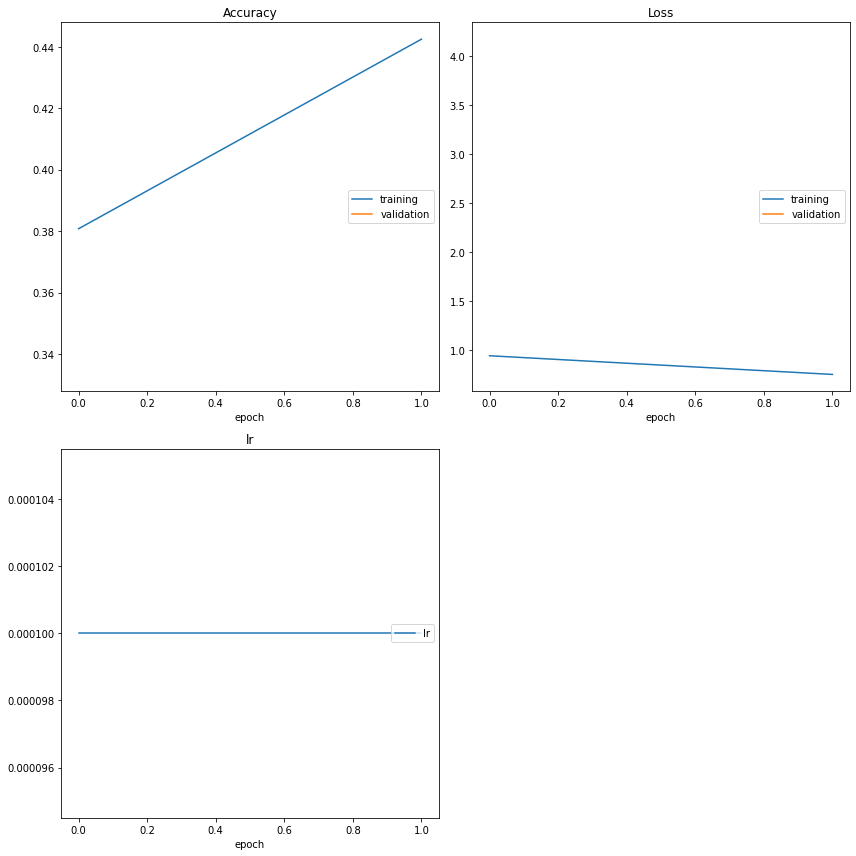

Accuracy
	training         	 (min:    0.381, max:    0.442, cur:    0.442)
	validation       	 (min:    0.333, max:    0.333, cur:    0.333)
Loss
	training         	 (min:    0.752, max:    0.943, cur:    0.752)
	validation       	 (min:    4.173, max:    4.173, cur:    4.173)
lr
	lr               	 (min:    0.000, max:    0.000, cur:    0.000)


KeyError: ignored

In [22]:
import keras

datapath='./output'
FOLDER = 'study2'

try:
  shutil.rmtree(os.path.join(datapath, FOLDER))
except:
  pass

if not os.path.isdir(os.path.join(datapath, FOLDER)):
    os.makedirs(os.path.join(datapath, FOLDER))

if not os.path.isdir(os.path.join(datapath, FOLDER, 'weights')):
    os.makedirs(os.path.join(datapath, FOLDER, 'weights'))
    
mc = keras.callbacks.ModelCheckpoint(os.path.join(datapath, FOLDER, 'weights', 'train_weights_epoch_{epoch:03d}.h5'),
                                    save_weights_only=True, save_freq=1)

hist = keras.callbacks.History()


csv_log   = os.path.join(os.path.join(datapath, FOLDER), 'training.csv')

early_stop = EarlyStopping(monitor='val_loss', patience=8, verbose=1, min_delta=1e-4)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=50, verbose=1, min_delta=1e-4)
callbacks_list = [mc, hist, reduce_lr, PlotLossesKeras(), CSVLogger(csv_log, append=False, separator=";")] 

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# 모델 학습
history = model.fit(
      train_generator,
      steps_per_epoch=50 ,
      epochs=10,
      callbacks=callbacks_list,
      validation_data=tune_generator,
      validation_steps=25,
      verbose=1)

### 5.2. 학습된 모델을 이용해 Test 데이터에 대한 Prediction

In [ ]:
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# For prediction purposes
y_pred = model.predict_generator(valid_generator, steps=valid_generator.samples, verbose=1)
y_pred1 = np.argmax(y_pred, axis=1)

In [ ]:
# y_test labeling
y_valid = valid_generator.labels

In [ ]:
# calculate confusion matrix for the predicted dataset
cm = confusion_matrix(y_valid, y_pred1)

# make a dataframe using cm array
df_cm = pd.DataFrame(cm, index = [i for i in classNames], columns = [i for i in classNames])

# plot confusion matrix
plt.figure(figsize = (10, 7))
sn.heatmap(df_cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [ ]:
# classification report generation: precision, recall, f1-score. 
print(classification_report(y_valid, y_pred1, target_names=classNames))

In [ ]:
def grad_cam(input_model, image):
    preds = input_model.predict(image)
    predicted_label = np.argmax(preds[0])
    heatmap_model = keras.Model([input_model.inputs], [input_model.get_layer('block5_conv3').output, input_model.output])        
    
    with tf.GradientTape() as tape:
        last_conv_outputs, predictions = heatmap_model(image) # VGG16의 마지막 convolution layer의 특성맵과 예측 벡터
        output = predictions[:, predicted_label]              # 예측 벡터에서 해당 클래스 항목
        
    grads = tape.gradient(output, last_conv_outputs)      # VGG16의 마지막 convolution layer의 특성맵 출력에 대한 해당 클래스의 그래디언트
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))  # 특성맵 채널별 그래디언트 평균값이 담긴 (512,) 크기의 벡터
    
    last_conv_outputs = last_conv_outputs.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i, w in enumerate(pooled_grads):                    # 해당 클래스에 대한 채널의 중요도를 특성 맵 배열의 채널에 곱함
        last_conv_outputs[:,:,i] *= w
        
    heatmap = np.mean(last_conv_outputs, axis=-1) # 만들어진 특성 맵에서 채널 축을 따라 평균 --> 해당 클래스의 히트맵
    
    # 히트맵 후처리
    heatmap = np.maximum(heatmap, 0)               
    heatmap /= np.max(heatmap)
    heatmap = cv2.resize(heatmap, (224, 224))

    # 입력 영상을 8-bit RGB 영상으로 변환
    image = image[0, :]
    image -= np.min(image)
    image = np.minimum(image, 255)

    cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
    cam = np.float32(cam) + np.float32(image)
    cam = 255 * cam / np.max(cam)
    
    return np.uint8(cam), heatmap, predicted_label

In [ ]:
import tensorflow as tf

# Select a random query image+
validList=os.listdir(os.path.join(dataDir, 'nodule'))
inum = np.random.randint(len(validList))
qimage=cv2.imread(os.path.join(dataDir, 'nodule', validList[inum]))
qimage = cv2.resize(qimage, (224, 224), interpolation = cv2.INTER_CUBIC)
# qimage0 = load_img(os.path.join(datavalidList_tmp[inum], target_size=(224, 224))

# qimage  = img_to_array(qimage0)
qimage  = qimage.reshape((1, 224, 224, 3))
qimage  = vgg16.preprocess_input(qimage)

# CAM 출력
cam, heatmap, plabel = grad_cam(model, qimage)
# plt.title('T:'+classNames[imageClass[inum]]+', P:'+classNames[plabel])
plt.imshow(cam)
plt.show()